In [1]:
from ep_predictor.predictor_backend import preprocessing, ep_prediction

In [2]:
#Constant Setup
pctg=50
cutout_size=33

#EFM9: binary_threshold=0.04, object_size=3, hole_size=30, m_thresh=0.30
#EFM8: binary_threshold=0.41, object_size=3, hole_size=30, m_thresh=0.778
#EFM7: binary_threshold=0.095, object_size=4, hole_size=15, m_thresh=0.44
#EFVM: binary_threshold=0.05, object_size=2, hole_size=2, m_thresh=0.785

name='efm8'
curves_file=rf'c:\Users\mcano\Code\rawdata\img_data\FHRbact1\Out_GetEpOnpx_2024-4_from_OUT_qi_sh4_tip2-data-2023.11.10-16.34.43.387_21-Mar-2024-19-13-48\lifts'
topography_file=rf'c:\Users\mcano\Code\rawdata\img_data\FHRbact1\Out_GetEpOnpx_2024-4_from_OUT_qi_sh4_tip2-data-2023.11.10-16.34.43.387_21-Mar-2024-19-13-48\FlattenTopo_.txt'
ref_file=rf"c:\Users\mcano\Code\rawdata\img_data\FHRbact1\Out_GetEpOnpx_2024-4_from_OUT_qi_sh4_tip2-data-2023.11.10-16.34.43.387_21-Mar-2024-19-13-48\Map_Ep.txt"
binary_threshold=0.067
object_size=3
hole_size=30
m_ep_thresh=0.3

c:\Users\mcano\Code\FAST\fast_smart_scanning\work_directory\other_examples\ep_predictor\predictor_backend.py:212: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  th=float(mask_ep.quantile(m_ep_thresh))


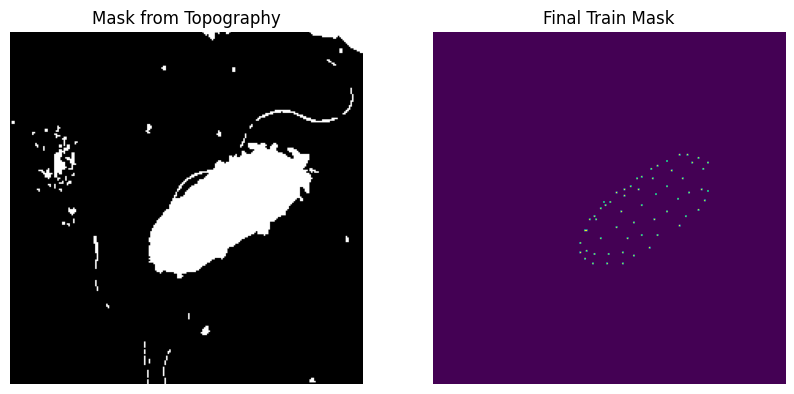

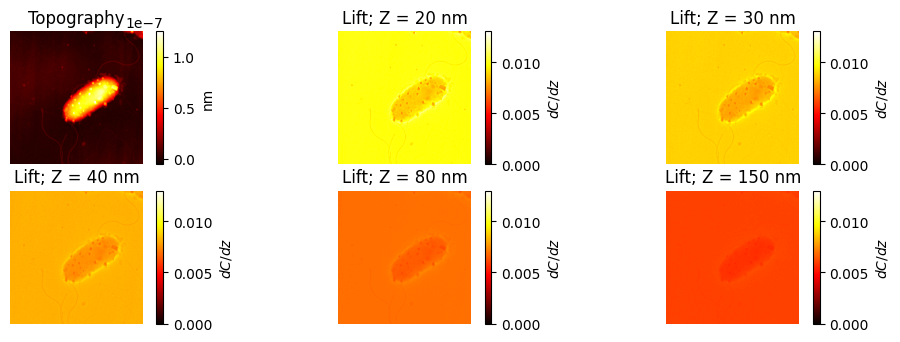

In [3]:
preproc = preprocessing(topography_file, curves_file, ref_file, cutout_size)
preproc.get_mask(binary_threshold, object_size, hole_size, m_ep_thresh)

preproc.get_fc(see_data=1, use_lifts=1)


In [4]:
preproc.get_conv(direct_mask=1)

100%|██████████| 5675/5675 [00:51<00:00, 109.68it/s]


In [5]:
ep_predict=ep_prediction(preproc,pctg)
ep_predict.train(verb=1)

Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 6.2420 - mae: 8.6498 - val_loss: 0.6216 - val_mae: 5.9853
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - loss: 0.4916 - mae: 4.6549 - val_loss: 0.3141 - val_mae: 5.9198
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 0.3606 - mae: 5.4357 - val_loss: 0.4628 - val_mae: 8.0511
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.5363 - mae: 7.4421 - val_loss: 0.3512 - val_mae: 6.3827
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 0.4124 - mae: 5.9819 - val_loss: 0.2105 - val_mae: 4.2450
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 0.2375 - mae: 4.1684 - val_loss: 0.1806 - val_mae: 3.6645
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 0.1455 - mae: 3.0144 - val_loss: 0.4193 - val_mae: 5.2558
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 0.3122 - mae: 3.8557 - val_loss: 0.1609 - val_mae: 3.3407
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.1528 -

178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
60, 60


c:\Users\mcano\Code\FAST\fast_smart_scanning\work_directory\other_examples\ep_predictor\predictor_backend.py:325: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  full_vec_roi[i]=y.iloc[i]
c:\Users\mcano\Code\FAST\fast_smart_scanning\work_directory\other_examples\ep_predictor\predictor_backend.py:340: RuntimeWarning: divide by zero encountered in divide
  error_map_r=(abs(np.subtract(y_mat, full_img_cell))/y_mat)*100
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The error map presents 26 error values > 1 (43.33%)


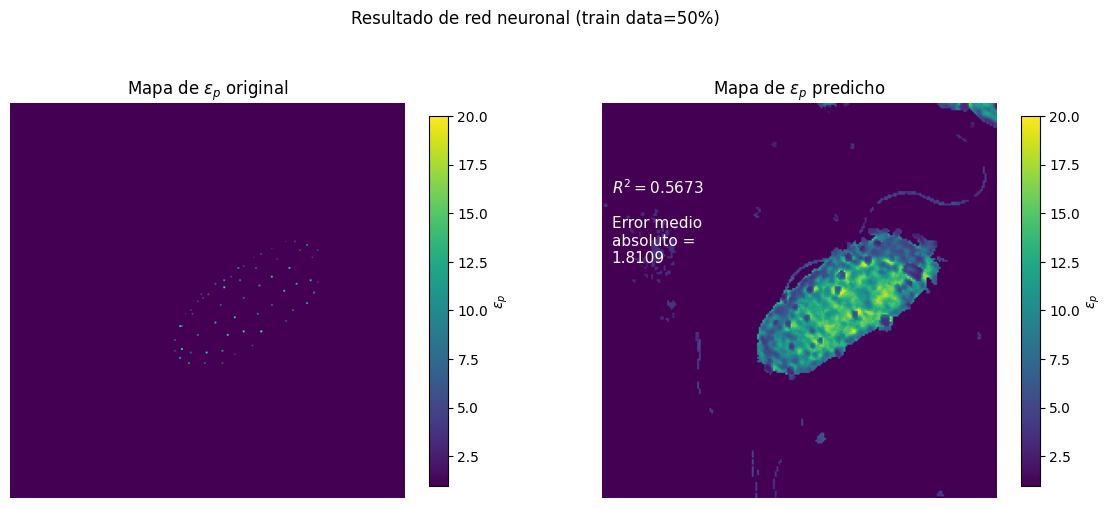

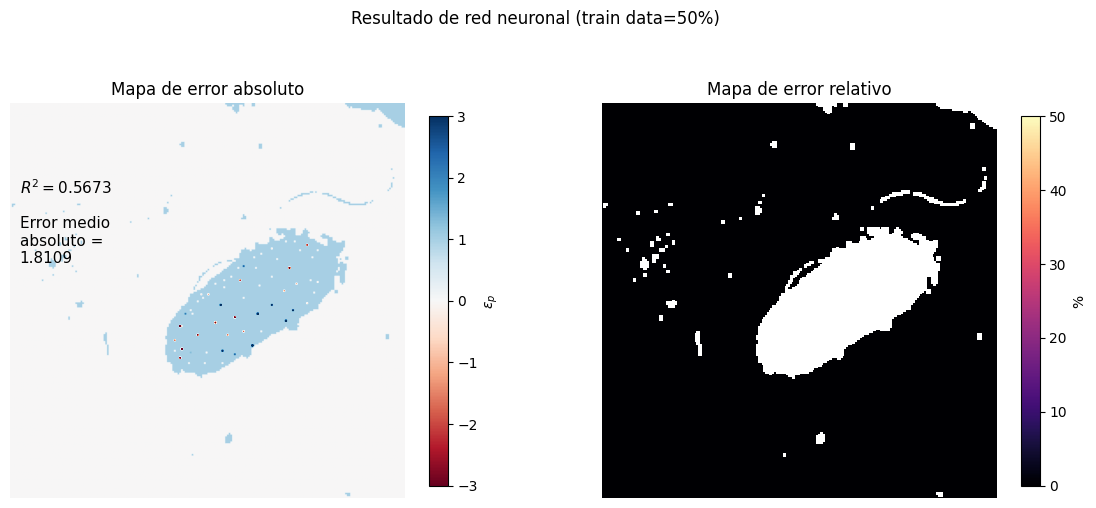

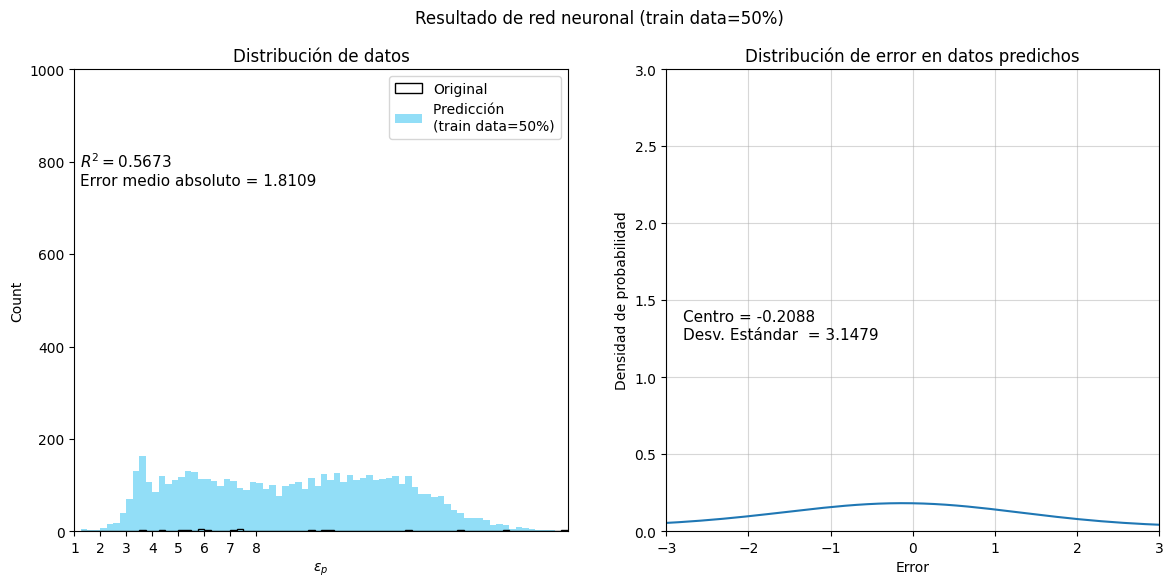

<Figure size 640x480 with 0 Axes>

In [6]:

ep_predict.predict(preproc.fc.x_masked_with_topo_norm,
              preproc.conv.x_cutouts_masked_from_topo)
ep_predict.reconstruct()
ep_predict.display_results(max_v=20)